In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data=pd.read_csv("meat_consumption.csv")

In [3]:
data

,location,indicator,subject,measure,frequency,time,value,flag_codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244,NaN
...,...,...,...,...,...,...,...,...
12135,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2024,732.149998,NaN
12136,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2025,737.008238,NaN
12137,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2026,741.104095,NaN
12138,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2027,743.489549,NaN


In [4]:
data=data.drop(['indicator', 'flag_codes', 'frequency'], axis=1)

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
data.head()

,location,subject,measure,time,value
0,AUS,BEEF,KG_CAP,1990,0.00
1,AUS,BEEF,KG_CAP,1991,27.81
2,AUS,BEEF,KG_CAP,1992,26.28
3,AUS,BEEF,KG_CAP,1993,26.24
4,AUS,BEEF,KG_CAP,1994,25.54


In [8]:
data.location.unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'EU27', 'OECD', 'BRICS',
       'NOR', 'CHE', 'GBR'], dtype=object)

In [9]:
data.subject.unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [10]:
data.measure.unique()

array(['KG_CAP', 'THND_TONNE'], dtype=object)

In [11]:
data.time.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028], dtype=int64)

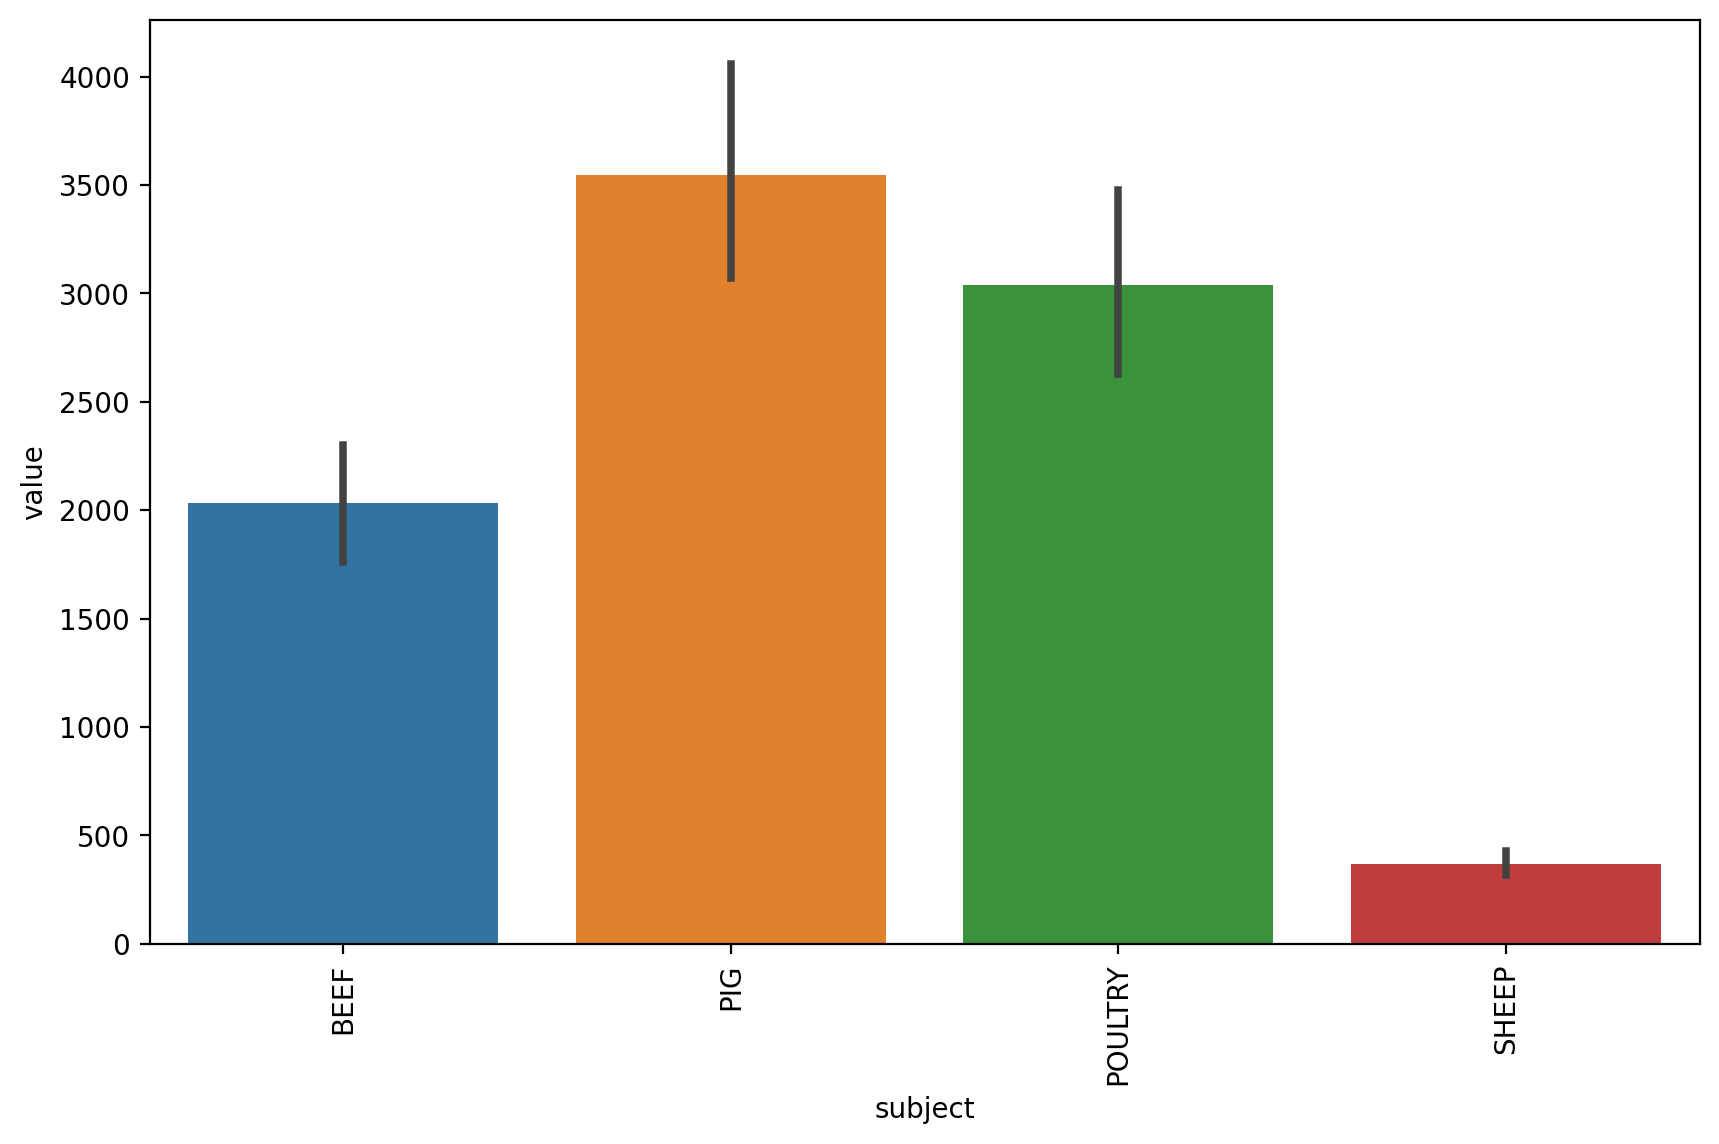

In [21]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=data, x='subject', y="value", estimator=np.mean)
plt.xticks(rotation=90);

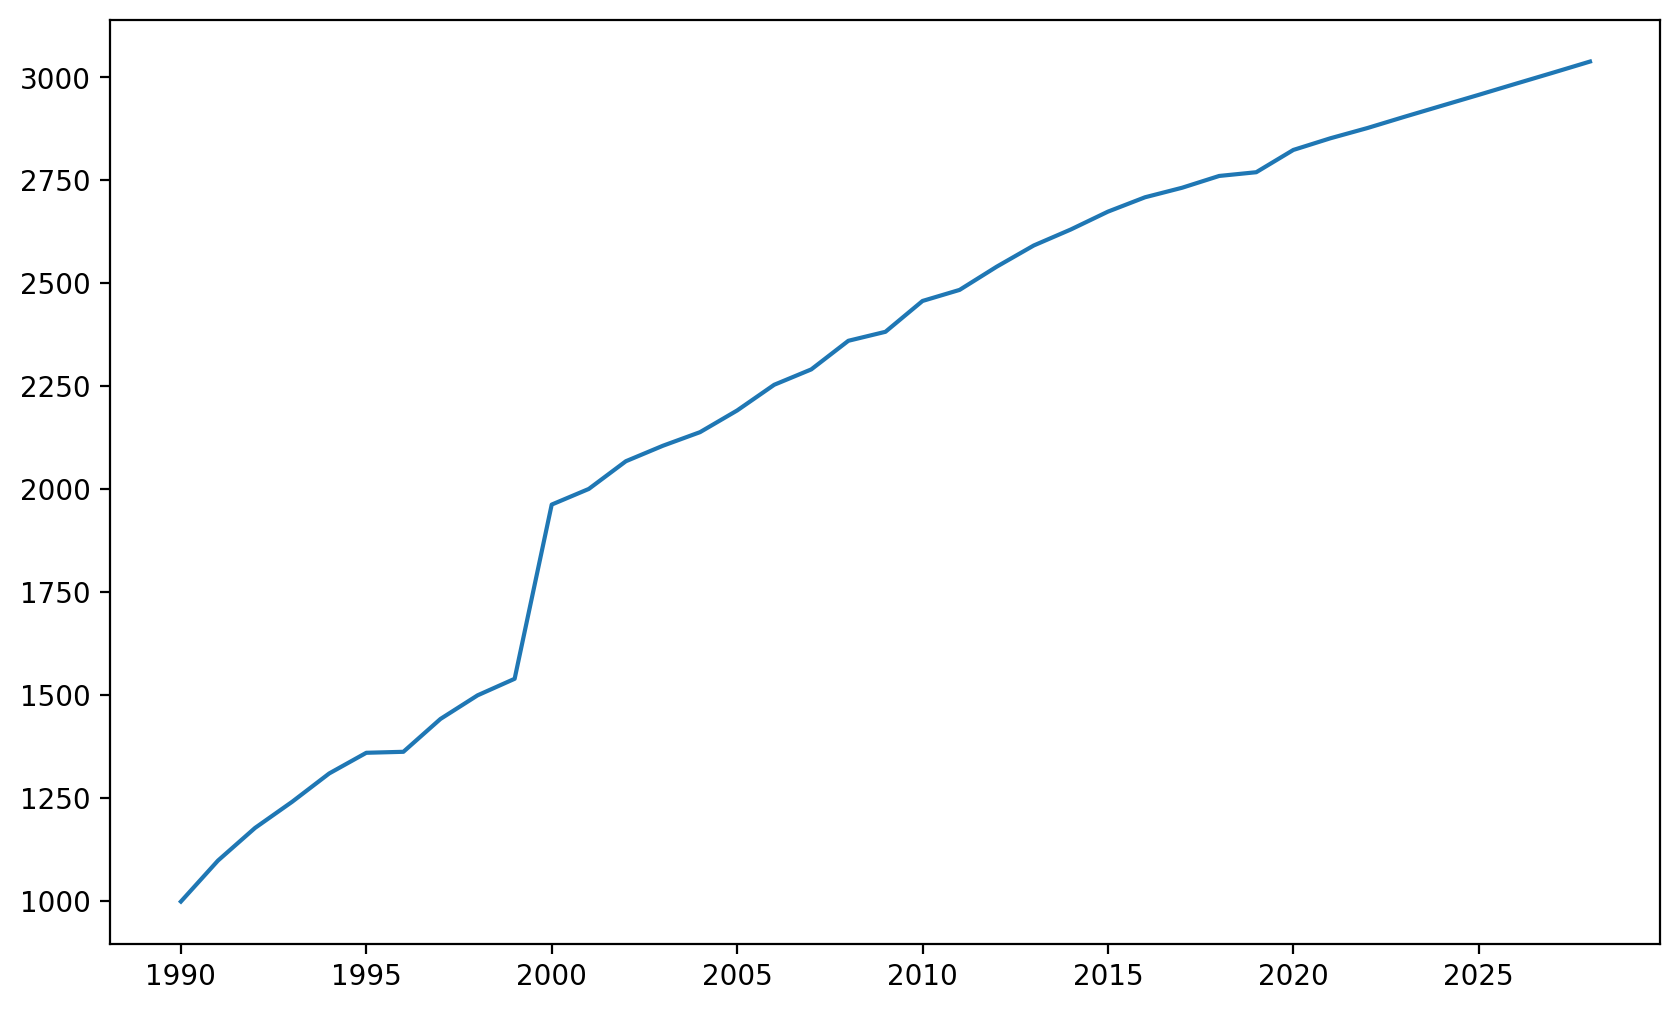

In [26]:
plt.figure(figsize=(10,6), dpi=200)
plt.plot(data.groupby("time").mean().index, data.groupby("time").mean().value)

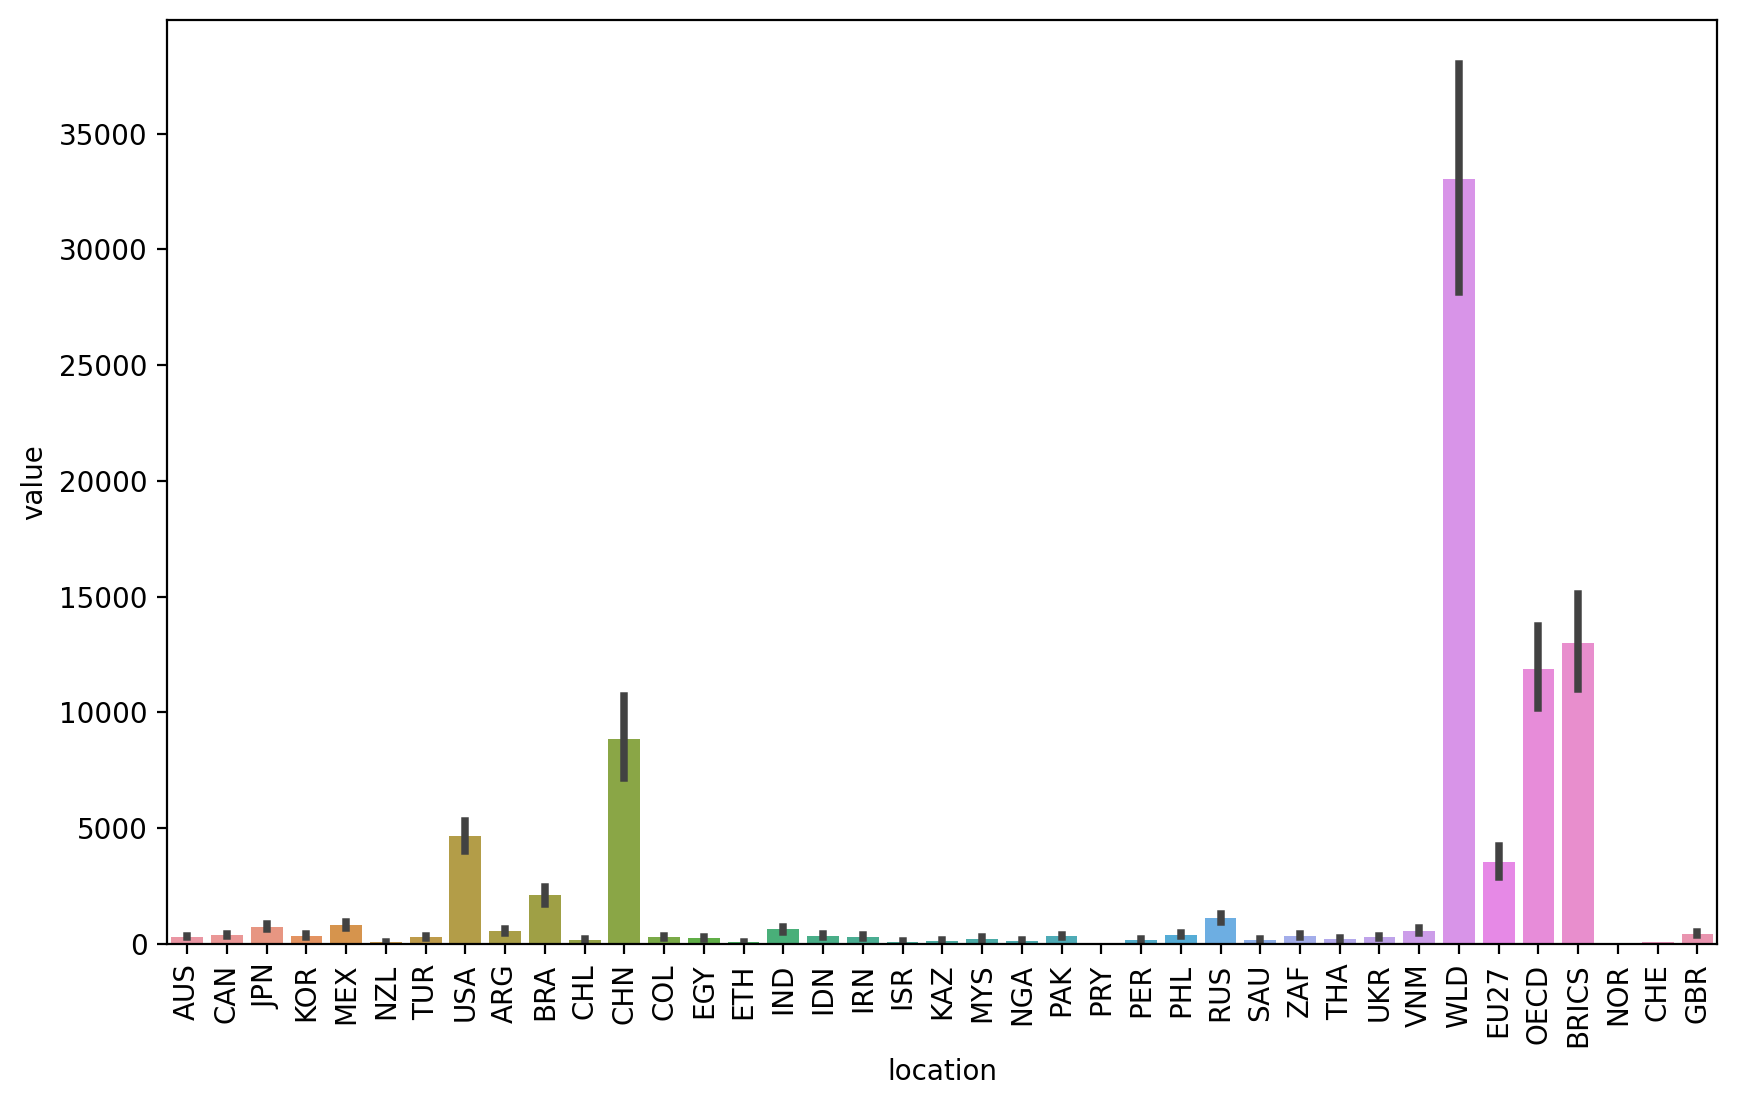

In [29]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=data, x='location', y="value", estimator=np.mean)
plt.xticks(rotation=90);

In [42]:
iso=pd.read_excel('Iso_codes.xlsx')
iso

,location,country
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,ASM,American Samoa
4,AND,Andorra
...,...,...
259,YEM,"Yemen, Rep."
260,SER,Yugoslavia
261,YUG,"Yugoslavia, FR (Serbia/Montene"
262,ZMB,Zambia


In [55]:
df=pd.merge(data, iso, on='location')
df=df.drop(['measure', 'location'],axis=1)

In [75]:
per_country=df.groupby('country').mean()
per_country= per_country[per_country.index!="World"].sort_values('value', ascending=False)

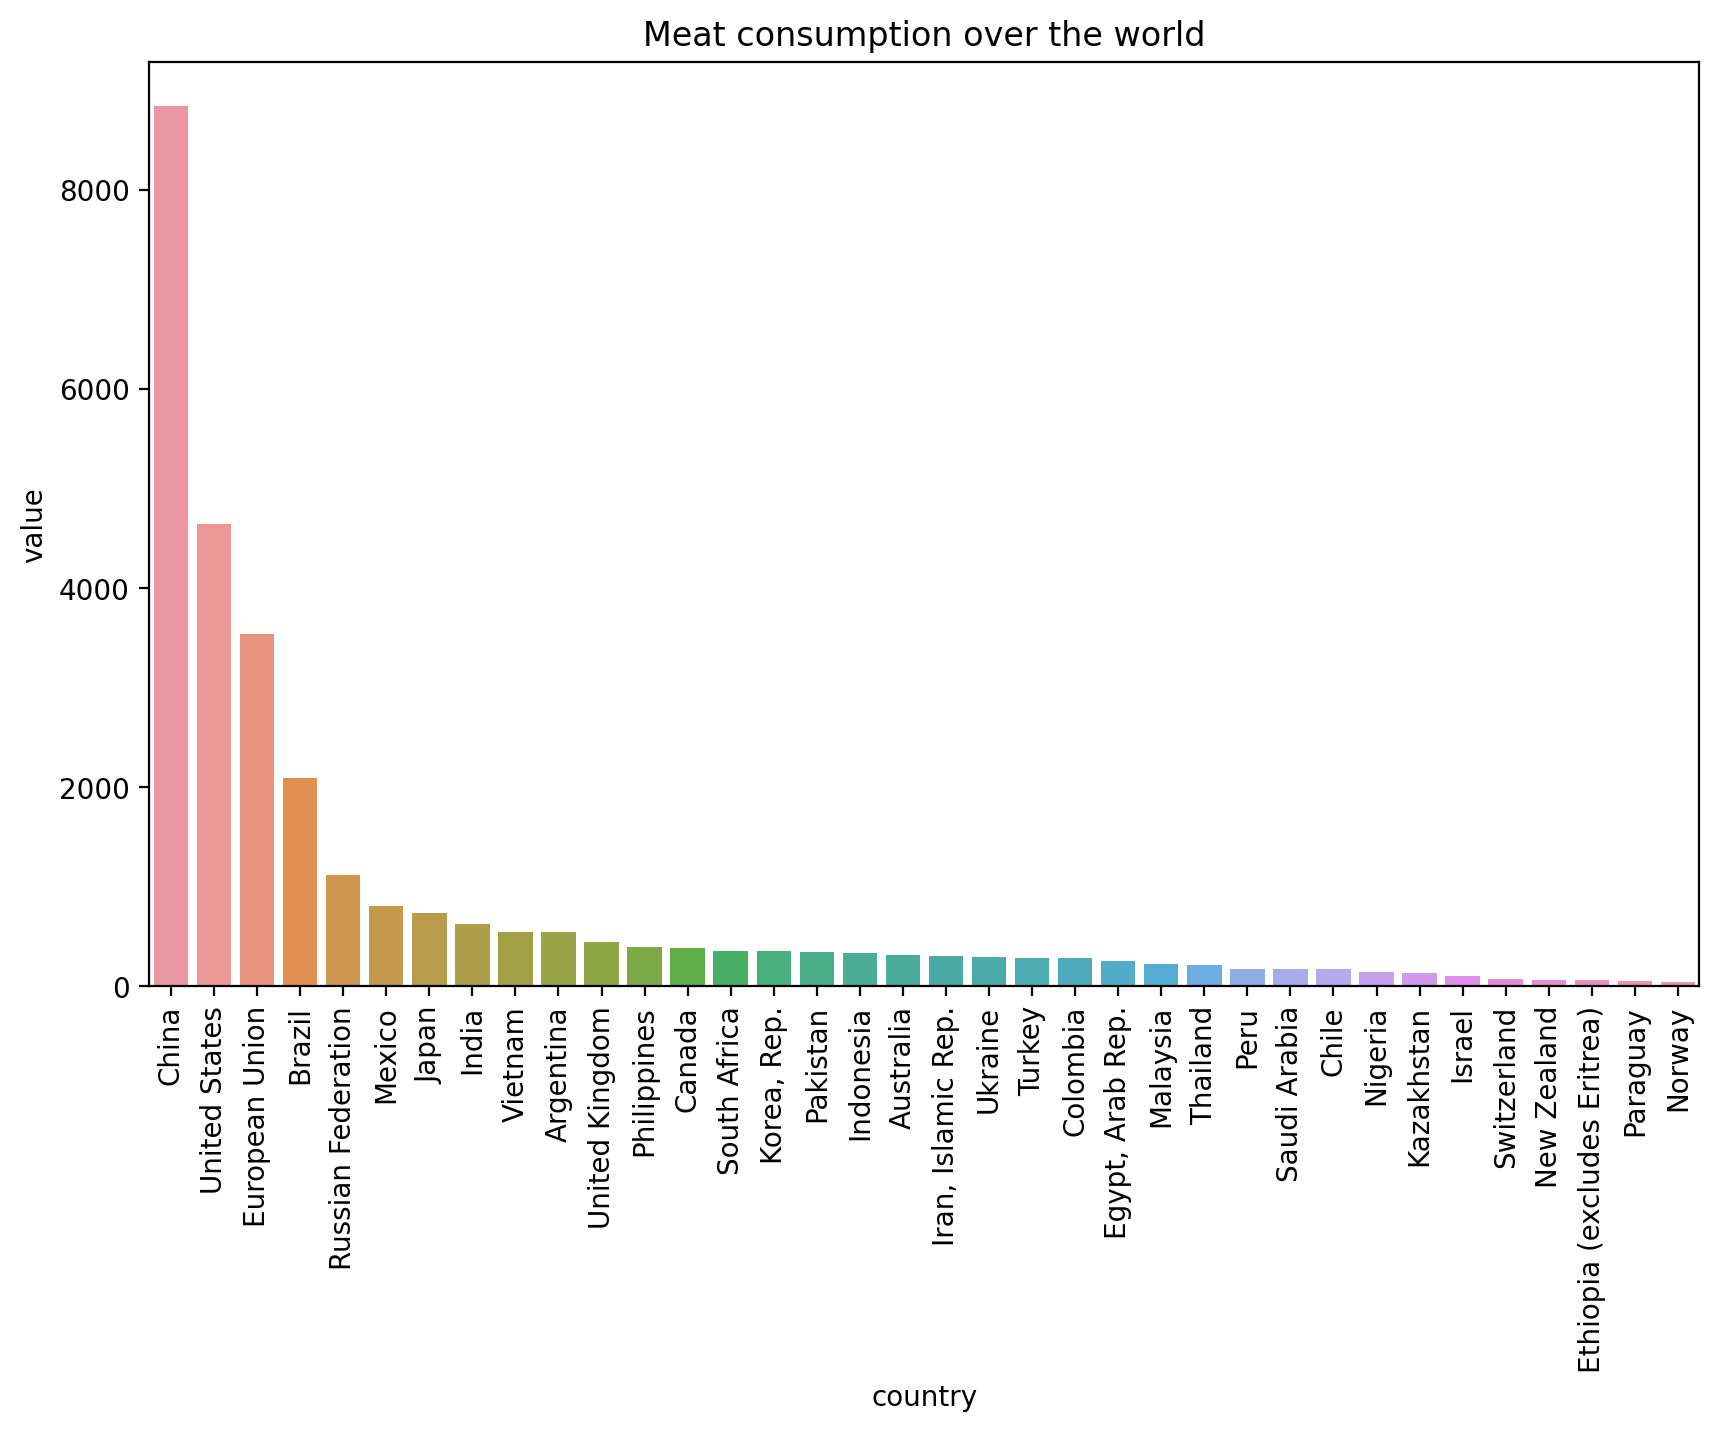

In [78]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=per_country, 
            x=per_country.index, y="value", estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Meat consumption over the world");

In [84]:
import plotly.express as px

In [124]:
averages=df.groupby(['country', 'subject']).mean().reset_index()
averages=averages[averages.country!="World"]
ave_per_country=averages.groupby('country').sum().reset_index()
averages=pd.merge(averages, ave_per_country, on='country').drop(['time_x', "time_y"],axis=1)
averages["percentage"]=averages.value_x/averages.value_y*100
averages


,country,subject,value_x,value_y,percentage
0,Argentina,BEEF,"1,257.84","2,186.22",57.53
1,Argentina,PIG,208.08,"2,186.22",9.52
2,Argentina,POULTRY,691.51,"2,186.22",31.63
3,Argentina,SHEEP,28.79,"2,186.22",1.32
4,Australia,BEEF,355.72,"1,253.50",28.38
...,...,...,...,...,...
139,United States,SHEEP,81.71,"18,596.93",0.44
140,Vietnam,BEEF,391.19,"2,196.39",17.81
141,Vietnam,PIG,"1,331.78","2,196.39",60.63
142,Vietnam,POULTRY,467.18,"2,196.39",21.27


In [137]:
fig=px.bar(averages.sort_values('value_y',ascending=False).head(40), 
       x='country', y='value_x', color='subject', barmode='stack', 
       text=averages.sort_values('value_y',ascending=False).head(40)['percentage'].apply(lambda x: '{0:1.1f}%'.format(x)),
       labels={'subject': "Type of meat", "value_x": "Average meat consumption", "country": "Country"})
fig.update_layout(title='Average meat consumption by type of meat per Top10 country')
fig.show()

In [159]:
time=df[df.country!="World"].groupby(['time', 'subject']).mean().reset_index()
ave_per_year=time.groupby('time').sum()
average_per_year=pd.merge(time, ave_per_year, on='time')
average_per_year["percentage"]=average_per_year.value_x/average_per_year.value_y*100
average_per_year

,time,subject,value_x,value_y,percentage
0,1990,BEEF,475.20,"1,479.26",32.12
1,1990,PIG,590.55,"1,479.26",39.92
2,1990,POULTRY,340.36,"1,479.26",23.01
3,1990,SHEEP,73.15,"1,479.26",4.94
4,1991,BEEF,496.87,"1,626.48",30.55
...,...,...,...,...,...
151,2027,SHEEP,162.66,"4,402.31",3.69
152,2028,BEEF,901.31,"4,441.96",20.29
153,2028,PIG,"1,687.88","4,441.96",38.00
154,2028,POULTRY,"1,688.28","4,441.96",38.01


In [161]:
fig=px.bar(average_per_year, 
       x='time', y='value_x', color='subject', barmode='stack', 
       text=average_per_year['percentage'].apply(lambda x: '{0:1.1f}%'.format(x)),
       labels={'subject': "Type of meat", "value_x": "Average meat consumption", "time": "Year"})
fig.update_layout(title='Average meat consumption by type of meat per year')
fig.show()